In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

In [3]:
nx = 100  # number of x steps
C  = 1
bc = 30
n  = 2
nt = 1000
a = 0.01
nit = 100
vis = 0.5
Lx = 2*np.pi
dx = Lx/(nx-1)
dt =  0.001*dx
x = np.arange(0,Lx+dx,dx)
u = np.zeros((nx))
p =  np.sin((x))
un = np.zeros((nx))
pn = np.ones((nx))

In [4]:
def continuity_equation(u,p):
    
    pn = np.empty_like(p)
    un = np.empty_like(u)
#     pn = p.copy()
    
    for q in range(nit):
        
        pn = p.copy()
        un = u.copy()
        
        pnx = pn[1:-1]-pn[0:-2]
        unx = un[1:-1]-un[0:-2]
        
        p[1:-1] = pn[1:-1]-dt/dx*(pnx*un[1:-1]+pn[1:-1]*unx)
        p[0] = p[-1]
        p[-1] = p[1]
        
#         print("test",p)               
    return p

In [5]:
# print(continuity_equation(u,p))

In [6]:
def sigma(p,C,n):
    return C*p**n

In [7]:
def compequation(u,p):
    
    for q in range(nit):
        
        p = continuity_equation(u,p)
        sig = sigma(p,C,n)
        
        pn = p.copy()
        un = u.copy() # shift it upper
        
        
        du = un[1:-1]-un[0:-2]
        dsig = sig[1:-1]-sig[0:-2]
        
        uxx = un[2:]-2*un[1:-1]+un[0:-2]
        
        u[1:-1] = un[1:-1]+dt*(-un[1:-1]*du/dx+vis*(-dsig/dx+vis*4*uxx/3/dx**2))
        
#         u[0:bc] = u[nx-bc:nx]
        u[0] = u[-1]
        u[-1] = u[1]


    return u,p

In [8]:
p = a*np.sin(x)
u = a*np.sin(x)
# u = np.random.random(nx)*a
# p = np.random.random(nx)*a
# u[0:bc] = u[nx-bc:nx]
# p[0:bc] = p[nx-bc:nx]
u,p = compequation(u,p)

In [9]:
print(np.sin(x))
print(u)

[ 0.00000000e+00  6.34239197e-02  1.26592454e-01  1.89251244e-01
  2.51147987e-01  3.12033446e-01  3.71662456e-01  4.29794912e-01
  4.86196736e-01  5.40640817e-01  5.92907929e-01  6.42787610e-01
  6.90079011e-01  7.34591709e-01  7.76146464e-01  8.14575952e-01
  8.49725430e-01  8.81453363e-01  9.09631995e-01  9.34147860e-01
  9.54902241e-01  9.71811568e-01  9.84807753e-01  9.93838464e-01
  9.98867339e-01  9.99874128e-01  9.96854776e-01  9.89821442e-01
  9.78802446e-01  9.63842159e-01  9.45000819e-01  9.22354294e-01
  8.95993774e-01  8.66025404e-01  8.32569855e-01  7.95761841e-01
  7.55749574e-01  7.12694171e-01  6.66769001e-01  6.18158986e-01
  5.67059864e-01  5.13677392e-01  4.58226522e-01  4.00930535e-01
  3.42020143e-01  2.81732557e-01  2.20310533e-01  1.58001396e-01
  9.50560433e-02  3.17279335e-02 -3.17279335e-02 -9.50560433e-02
 -1.58001396e-01 -2.20310533e-01 -2.81732557e-01 -3.42020143e-01
 -4.00930535e-01 -4.58226522e-01 -5.13677392e-01 -5.67059864e-01
 -6.18158986e-01 -6.66769

In [10]:
print(u,p)

[ 0.00089373  0.00089593  0.00131598  0.00189613  0.00250679  0.00311347
  0.00370836  0.00428839  0.00485117  0.00539442  0.00591595  0.00641367
  0.00688558  0.00732976  0.00774444  0.00812794  0.00847871  0.00879536
  0.0090766   0.00932129  0.00952845  0.00969726  0.00982701  0.00991721
  0.00996747  0.00997759  0.00994754  0.00987744  0.00976756  0.00961834
  0.0094304   0.00920447  0.00894148  0.00864248  0.00830867  0.0079414
  0.00754214  0.00711251  0.00665422  0.00616914  0.00565921  0.00512648
  0.00457311  0.00400131  0.0034134   0.00281173  0.00219874  0.00157689
  0.00094869  0.00031667 -0.00031663 -0.00094865 -0.00157686 -0.00219871
 -0.0028117  -0.00341337 -0.00400129 -0.00457309 -0.00512648 -0.00565921
 -0.00616915 -0.00665424 -0.00711253 -0.00754217 -0.00794143 -0.00830871
 -0.00864253 -0.00894154 -0.00920454 -0.00943046 -0.00961842 -0.00976763
 -0.00987752 -0.00994762 -0.00997767 -0.00996755 -0.00991728 -0.00982709
 -0.00969733 -0.00952852 -0.00932135 -0.00907665 -0.

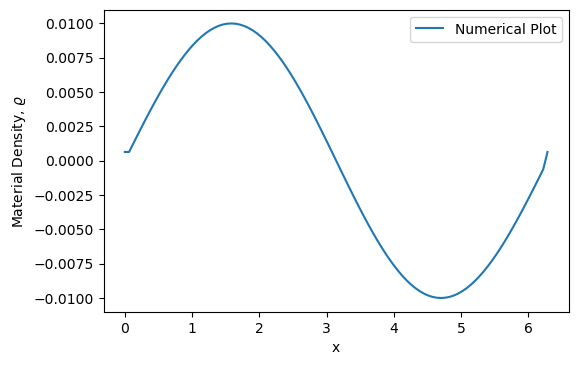

In [11]:
plt.figure(dpi=100)
plt.plot(x,p,'-',label="Numerical Plot")
plt.xlabel("x")
plt.ylabel(r"Material Density, $\varrho$")
plt.legend()
plt.show()

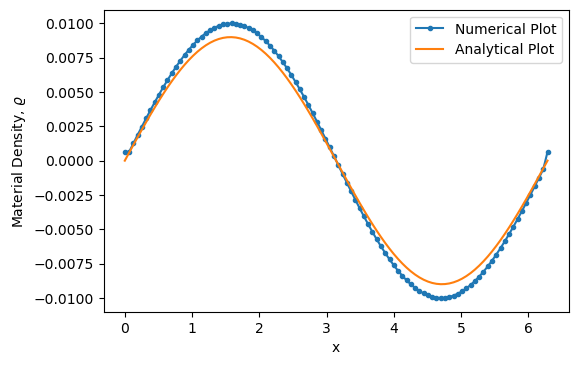

In [12]:
plt.figure(dpi=100)
plt.plot(x,p,'.-',label="Numerical Plot")
x2 = np.linspace(0,2*np.pi,100)
y2 = a*1.8/2*np.sin(x)
plt.xlabel("x")

plt.ylabel(r"Material Density, $\varrho$")
plt.plot(x2,y2,label="Analytical Plot")
plt.legend()
plt.show()



Text(0, 0.5, 'Velocity, $u$')

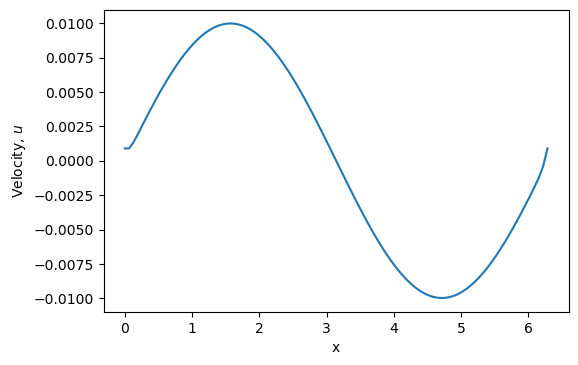

In [13]:
plt.figure(dpi=100)
plt.plot(x,u)
plt.xlabel("x")

plt.ylabel(r"Velocity, $u$")

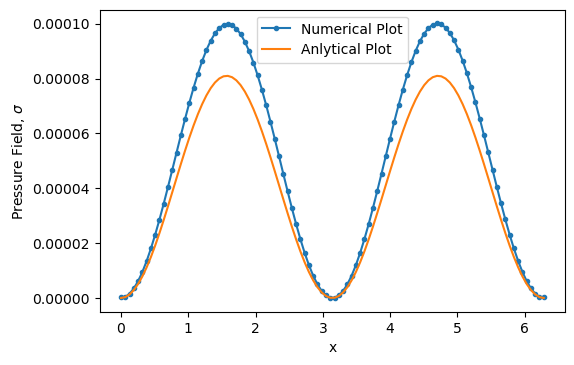

In [14]:
plt.figure(dpi=100)
plt.plot(x,sigma(p,C,n),'.-',label="Numerical Plot")
x1 = np.linspace(0,2*np.pi,100)
y1 = a**2/2*np.cos(2*x1+2.8)+a**2/2
plt.plot(x1,y2**2,label="Anlytical Plot")
plt.xlabel("x")
plt.ylabel(r"Pressure Field, $\sigma$")
plt.legend()
plt.show()

NameError: name 'xv' is not defined

<Figure size 500x300 with 0 Axes>